# **#2 Homework: Classification**

**Fundamentals of Data Science - Winter Semester 2024**

##### Matteo Migliarini (TA), Matteo Rampolla (TA) and Prof. Indro Spinelli
<migliarini.1886186@studenti.uniroma1.it>, <rampolla.1762214@studenti.uniroma1.it>, <spinelli@di.uniroma1.it>

---

*Note: your task is to fill in the missing code where you see `"YOUR CODE HERE"` and the text part `"WRITE YOUR TEXT HERE"` part corresponding to each subproblem and produce brief reports on the results whenever necessary. Note also that a part of this missing code is also distributed in the python files in the folder `libs/`*

As part of the homework, provide the answer to questions in this notebook report-like manner.

After you have implemented all the missing code in the required sections, you will be able to run all the code without any errors.

We kindly ask you to double-check this since **all** the delivered homework will be executed.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.

-------------------------------------

**Submit it** by sending an email to:

<migliarini.1886186@studenti.uniroma1.it>, <rampolla.1762214@studenti.uniroma1.it> and <spinelli@di.uniroma1.it> **by 29th November, 23:59**.

-------------------------------------

**Outline and Scores for #2 Homework:**


* **Question 1: Logistic Regression** *(6 points)*
  * **1.1: Log-likelihood and Gradient Ascent rule** (1 points)
  * **1.2: Implementation of Logistic Regression with Gradient Ascent** (2 points)
  * **1.3: Report** (3 points)
* **Question 2: Polynomial Expansion** *(7 points)*
  * **2.1: Polynomial features for logistic regression** (1 points)
  * **2.2: Plot the computed non-linear boundary** (2 point)
  * **2.4: Penalization** (4 points)
* **Question 3: Multinomial Classification** *(9  points)*
  * **3.1: Softmax Regression Model** (1 point)
  * **3.2: Coding** (3 points)
  * **3.3: Pipeline** (2 point)
  * **3.4: Hyperparameters** (1 point)
  * **3.5: Report** (2 point)
* **Question 4: First approach to CNNs** *(8 points)*
  * **4.1: Split the CIFAR-10 dataset** (1 point)
  * **4.2: Identify and Correct Errors in the CNN Model** (3 points)
  * **4.3: Training procedure** (2 points)
  * **4.4: Evaluate** (1 point)
  * **4.5: Report** (1 point)
* **Question 5: Improve the accuracy** (BONUS) *(5 points)*
  * **5.1: Custom model** (3 points)
  * **5.2: Pretrained Network** (2 points)

**TOTAL POINTS ARE 35, MAXIMUM GRADE IS 30**

---


In [1]:
if True:
    %pip install -qqq numpy scipy matplotlib pandas scikit-learn seaborn tqdm torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [1]:
from IPython.core.magic import register_line_magic
import numpy as np

@register_line_magic
def set_global_seed(seed = '42'):
    '''
    Function to set a seed for reproducibility across all the cells
    '''
    np.random.seed(int(seed))
    print(f"Seed setted to: {seed}")

In [2]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%load_ext autoreload
%autoreload 2
%set_global_seed 42

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

Seed setted to: 42


**Notation:**

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

**Let's start by setting up our Python environment and importing the required libraries:**

## 1: **Logistic Regression**

### **1.1: Log-likelihood and Gradient Ascent Rule**

Write the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation.

-------------------------------------------------------

**WRITE YOUR EQUATIONS HERE**

- **Likelihood**:
\begin{align*}
L(\theta) &= \prod_{i=1}^{n} P(y^{(i)}|x^{(i)};\theta) = \prod_{i=1}^{n} [h_{\theta}(x^{(i)})]^{y^{(i)}} [1-h_{\theta}(x^{(i)})]^{1-y^{(i)}}
\end{align*}
Because the probability of $y^{(i)}$ given $x^{(i)}$ is:

\begin{align*}
P(y^{(i)}|x^{(i)};\theta) &= \begin{cases}
h_\theta(x^{(i)}) & \text{if } y^{(i)} = 1 \\
1 - h_\theta(x^{(i)}) & \text{if } y^{(i)} = 0
\end{cases}
\end{align*}

- **Log-Likelihood**:

\begin{align*}
l(\theta) &= \log L(\theta) = \sum_{i=1}^{n}[y^{(i)}\log h_{\theta}(x^{(i)})+(1-y^{(i)})\log(1-h_{(\theta)}(x^{(i)}))]
\end{align*}

- **Gradient of log-likelihood** (slide 5 p. 20):
\begin{align*}
\frac{\delta l(\theta)}{\delta \theta_j} &= \sum_{i=1}^{n} \bigg[\frac{y^{(i)}}{h_{(\theta)}(x^{(i)})} \cdot \frac{\delta h_{(\theta)}(x^{(i)})}{\delta \theta_{j}} - \frac{1-y^{(i)}}{1-h_{(\theta)}(x^{(i)})} \cdot \frac{\delta h_{(\theta)}(x^{(i)})}{\delta \theta_j}    \bigg]
\end{align*}

Take now the derivation of
\begin{align*}
\frac{\delta h_{(\theta)}(x^{(i)})}{\delta \theta_{j}} &= h_{(\theta)}(x^{(i)})(1- h_{(\theta)}(x^{(i)}))x_{j}^{(i)}
\end{align*}

Substitute

\begin{align*}
\frac{\delta l(\theta)}{\delta \theta_j} &= \sum_{i=1}^{n} \bigg( [ y^{(i)}(1- h_{(\theta)}(x^{(i)}))x_{j}^{(i)} ] - [(1 - y^{(i)})(h_{(\theta)}(x^{(i)}))x_{j}^{(i)}] \bigg)
\end{align*}

So we can now collect $x_{j}^{(i)}$ and do the product


\begin{align*}
\frac{\delta l(\theta)}{\delta \theta_j} &= \sum_{i=1}^{n} \bigg(  [y^{(i)} - y^{(i)}\cdot h_{(\theta)}(x^{(i)})] - [h_{(\theta)}(x^{(i)}) - y^{(i)} \cdot h_{(\theta)}(x^{(i)})] \bigg)x_{j}^{(i)}
\end{align*}

In the end we obtain
\begin{align*}
\frac{\delta l(\theta)}{\delta \theta_j} &= \sum_{i=1}^{n} \bigg( y^{(i)} -   h_{(\theta)}(x^{(i)})     \bigg)x_{j}^{(i)}
\end{align*}


- **Gradient update equation**:
For  $j=0,...,n$:
\begin{equation*}
\theta_j = \theta_j + \alpha\frac{\delta l(\theta)}{\delta \theta_j}
\end{equation*}
We can substitute:

\begin{equation*}
\theta_j = \theta_j + \alpha \sum_{i=1}^{n} \bigg( y^{(i)} -   h_{(\theta)}(x^{(i)})     \bigg)x_{j}^{(i)}
\end{equation*}

-------------------------------------------------------

### **1.2: Logistic regression with Gradient Ascent**

Define the sigmoid function `sigmoid`, then define the `LogisticRegression` class with the relative methods necessary to make predictions on an input, compute the log-likelihood and update its parameters.
Then define a function that takes in input such $X$, $y$ and the predictions $\hat{y} = g(\theta^{T}x)$ and computes the gradient of the log-likelihood.
Finally implement a function that takes in input such class and performs the training loop with the specified hyperparameters.

Translate the equations you wrote above in code to learn the logistic regression parameters, $x^{(i)}_1$ and $x^{(i)}_2$ represent the two features for the $i$-th data sample $x^{(i)}$ and $y^{(i)}$ is its ground truth label.

*Hint: even though by definition log likelihood and gradient ascent are defined by summations, for numerical stability it is advised to use the mean operation.*

--------------------------------------------

**Fill in the code in `libs/models/logisic_regression.py`, `libs/math.py/sigmoid()` and `libs/optim.py`**

--------------------------------------------

In [26]:
from libs.models import LogisticRegression
from libs.optim import fit

**Check your grad_l implementation:**

`LogisticRegression.log_likelihood` applied to some random vectors should provide a value for `output_test` close to the `target_value` (defined below).
In other words, `error_test` should be close to 0.

**Do not write below this line just run it**

--------------------------------------------

In [5]:
target_value = -1
np.random.seed(1)
output_test = LogisticRegression.likelihood(np.random.random(100), np.random.randint(0, 2, 100))
error_test = np.abs(output_test - target_value)
print("Error: ", error_test)
assert error_test < 0.2, "The output is not correct"

Error:  0.03199609770922396


#### Preprocessing
<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width=800/>

Now you'll load a dataset of penguins data. The dataset contains three species of penguins (Adelie, Gentoo and Chinstrap). Your goal will be to classify a penguin species based on their bill's length and body mass. First we'll load the dataset:

In [6]:
data = pd.read_csv("assets/train.csv")
data.head()

,Id,island,sex,species,bill_length,bill_depth,flipper_length,body_mass
0,182,Biscoe,FEMALE,Gentoo,47.10,16.00,184.43,2862.01
1,39,Biscoe,FEMALE,Gentoo,55.63,7.55,187.28,3345.10
2,265,Torgersen,FEMALE,Adelie,35.03,19.80,202.43,3536.63
3,158,Biscoe,NaN,Gentoo,28.18,20.59,220.22,4235.40
4,254,Dream,MALE,Chinstrap,25.38,25.22,233.34,5732.33


We want to train a classifier capable of understanding the difference between Adelie and Gentoo solely based on their bill's length and body mass. Thus in order to preprocess the data we:
1. Drop all the items with null data.
2. Remove the third species (Chinstrap) from the dataset.
3. Select the features we're interested in (`bill_length`, `body_mass`).
4. Select the label data and encode it in the values 0 and 1.

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="500"/>

In [7]:
data.dropna(inplace=True)
data = data[data["species"] != "Chinstrap"]
X = data[["bill_length", "body_mass"]]
y = data["species"].map({"Adelie": 0, "Gentoo": 1}).values

It is recommended to normalize data when using machine learning techniques, so now normalize $X$ to have $\mu=0, \sigma=1$.

In [8]:
# Import the StandardScaler() function provided by Scikit-Learn
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object
ss = StandardScaler()

# Fit the StandardScaler on the input data and transform it
X_scaled = ss.fit_transform(X)

# Update the DataFrame with the transformed columns
X = pd.DataFrame(X_scaled, columns= X.columns)

We add a column of 1's to $X$ to take into account the intercept.

In [9]:
X["bias"] = 1
# Reordering columns to have the bias term first (convention)
X = X[["bias", "bill_length", "body_mass"]]
X

,bias,bill_length,body_mass
0,1,0.445499,-0.751204
1,1,1.025744,-0.509130
2,1,-0.375551,-0.413156
3,1,0.438696,0.635719
4,1,-1.501349,0.579251
...,...,...,...
146,1,0.811468,0.193173
147,1,-0.793219,-0.316630
148,1,-1.433325,0.094282
149,1,0.791061,-0.037160


#### Training
Now you'll use the class defined above to train a logistic regression model on classifying a group of penguins.

In [10]:
# Initialize the model
model = LogisticRegression(num_features=X.shape[1])

# Run Gradient Ascent method
n_iter = 50
log_l_history, _ = fit(model, X, y, lr=0.5, num_steps=n_iter)

Let's plot the log likelihood over different iterations:


Text(0.5, 0, 'Iterations')

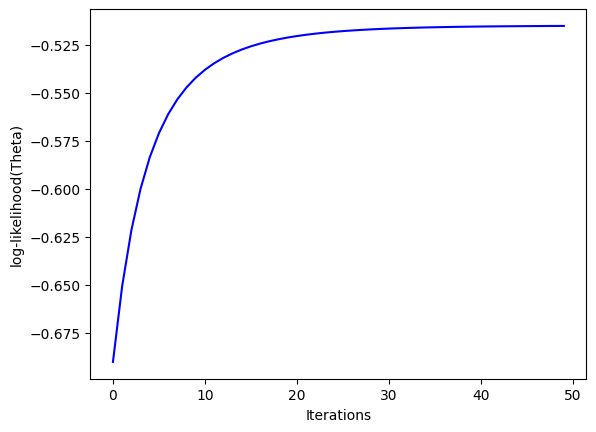

In [11]:
plt.plot(range(len(log_l_history)), log_l_history, "b")
plt.ylabel("log-likelihood(Theta)")
plt.xlabel("Iterations")

Plot the data and the decision boundary:

(-2.4699595998040142, 2.5803777103306857)

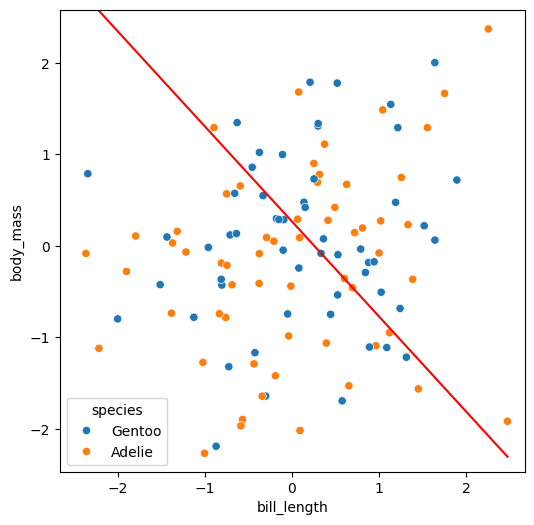

In [12]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=X, x="bill_length", y="body_mass", hue=data["species"])

x_range = np.linspace(X['bill_length'].min(), X['bill_length'].max(), 100)
theta_final = model.parameters
y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
plt.plot(x_range, y_range, c="red")

plt.xlim(X['bill_length'].min() - 0.2, X['bill_length'].max() + 0.2)
plt.ylim(X['body_mass'].min() - 0.2, X['body_mass'].max() + 0.2)

In [13]:
accuracy = ((model.predict(X) > 0.5) == y).mean()
print(f"Accuracy: {accuracy}")
assert accuracy > 0.6, "The accuracy is too low"

Accuracy: 0.7615894039735099


### **1.3: Report**

1. Are we looking for a local minimum or a local maximum using the gradient ascent rule?
2. You have implemented the gradient ascent rule. Could we have also used gradient descent instead for the proposed problem? Why/Why not?
3. Let's deeply analyze how the learning rate $\alpha$ and the number of iterations affect the final results. Run the algorithm you have written for different values of $\alpha$ and the number of iterations and look at the outputs you get. Is the decision boundary influenced by these parameters change? Why do you think these parameters are affecting/not affecting the results?
4. What happens if you do not normalize the data? Try to run the algorithm without normalizing the data and see what happens. Why do you think this happens?



### 1. Are we looking for a local minimum or a local maximum using the gradient ascent rule?
- In the case of logistic regression with gradient ascent, we aim to find a **local maximum** of the log-likelihood function. The gradient ascent rule moves in the direction of the steepest increase in the log-likelihood, guiding us to the parameter values that maximize the likelihood of the observed data.

---

### 2. You have implemented the gradient ascent rule. Could we have also used gradient descent instead for the proposed problem? Why/Why not?
- Yes, we could use **gradient descent**, but in that case, we would minimize the **negative** of the log-likelihood function. Logistic regression involves maximizing the log-likelihood to find the optimal parameters, and since gradient descent is typically used for minimization tasks, applying it would require minimizing the negative log-likelihood.  
However, using gradient ascent directly maximizes the log-likelihood, making it a more natural and straightforward choice for this problem.

---

### 3. Let's deeply analyze how the learning rate $\alpha$ and the number of iterations affect the final results. Run the algorithm you have written for different values of $\alpha$ and the number of iterations and look at the outputs you get. Is the decision boundary influenced by these parameters change? Why do you think these parameters are affecting/not affecting the results?
- The **learning rate ($\alpha$)** and the **number of iterations** significantly impact the convergence and performance of the gradient ascent algorithm.  
   - A larger learning rate might cause the algorithm to overshoot the optimal parameter values, potentially preventing convergence.  
   - A smaller learning rate could result in slow convergence or even getting stuck at a suboptimal point.  
- The **number of iterations** controls how long the algorithm is allowed to refine the parameter estimates. If the number of iterations is too low, the model might not converge fully, leading to an inaccurate decision boundary.  
Both the decision boundary and results are influenced by these parameters since they affect the learning process and how well the model separates the classes.  
That said, in our case, the algorithm converges to the optimum during the parameter initialization phase. As you can see from the cells right below, in our case changing the learning rate and the number of iterations does not change the accuracy of the model.

---

In [16]:
model = LogisticRegression(num_features=X.shape[1])
for lr in np.arange(0.7, 0., -0.05):
    for n_iter in range (100, 700, 100):
        log_l_history, _ = fit(model, X, y, lr, num_steps=n_iter)
        accuracy = ((model.predict(X) > 0.5) == y).mean()
        print( f"Log Likelihood : {log_l_history[-1]} with Learning Rate: {round(lr, 3)} and number of Iteration: {n_iter}, gives an accuracy of: {accuracy}" )

Log Likelihood : -0.5148250762936495 with Learning Rate: 0.7 and number of Iteration: 100, gives an accuracy of: 0.7615894039735099
Log Likelihood : -0.5148242627573794 with Learning Rate: 0.7 and number of Iteration: 200, gives an accuracy of: 0.7615894039735099
Log Likelihood : -0.5148242627573789 with Learning Rate: 0.7 and number of Iteration: 300, gives an accuracy of: 0.7615894039735099
Log Likelihood : -0.5148242627573788 with Learning Rate: 0.7 and number of Iteration: 400, gives an accuracy of: 0.7615894039735099
Log Likelihood : -0.5148242627573788 with Learning Rate: 0.7 and number of Iteration: 500, gives an accuracy of: 0.7615894039735099
Log Likelihood : -0.5148242627573788 with Learning Rate: 0.7 and number of Iteration: 600, gives an accuracy of: 0.7615894039735099
Log Likelihood : -0.5148242627573788 with Learning Rate: 0.65 and number of Iteration: 100, gives an accuracy of: 0.7615894039735099
Log Likelihood : -0.5148242627573788 with Learning Rate: 0.65 and number of

### 4. What happens if you do not normalize the data? Try to run the algorithm without normalizing the data and see what happens. Why do you think this happens?
- Without **normalizing the data**, features with larger values (e.g., `body_mass`) will dominate the gradient computation, leading to a biased optimization process. This imbalance can slow down convergence or even cause the gradient ascent algorithm to miss the optimal solution.  

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>bias</th>
      <th>bill_length</th>
      <th>body_mass</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>47.10</td>
      <td>2862.01</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>55.63</td>
      <td>3345.10</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>35.03</td>
      <td>3536.63</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1</td>
      <td>47.00</td>
      <td>5629.80</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1</td>
      <td>18.48</td>
      <td>5517.11</td>
    </tr>
  </tbody>
</table>
</div>

By normalizing the data, all features are scaled to a similar range, ensuring equal contribution to the gradient calculation. This adjustment helps the model converge faster and more accurately, resulting in a better decision boundary. Essentially, the variations in one variable will correspond to proportional variations in other variables, improving the overall learning process. Infact, for the non normalized data we obtain a lower accuracy:

```python
Accuracy: 0.46357615894039733
```

In the plot below, you can see how the decision boundary is biased by a missing normalization of the data.

--- 

Accuracy: 0.46357615894039733


c:\Users\xavie\Documents\HW2_FDS\libs\math.py:14: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-x))
c:\Users\xavie\Documents\HW2_FDS\libs\math.py:14: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-x))
c:\Users\xavie\Documents\HW2_FDS\libs\math.py:14: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-x))
c:\Users\xavie\Documents\HW2_FDS\libs\math.py:14: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-x))
c:\Users\xavie\Documents\HW2_FDS\libs\math.py:14: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-x))
c:\Users\xavie\Documents\HW2_FDS\libs\math.py:14: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-x))
c:\Users\xavie\Documents\HW2_FDS\libs\math.py:14: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-x))
c:\Users\xavie\Documents\HW2_FDS\libs\math.py:14: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-x))
c:\Users\xavie\Documents\HW2_FDS

(-169.07, 9111.7)

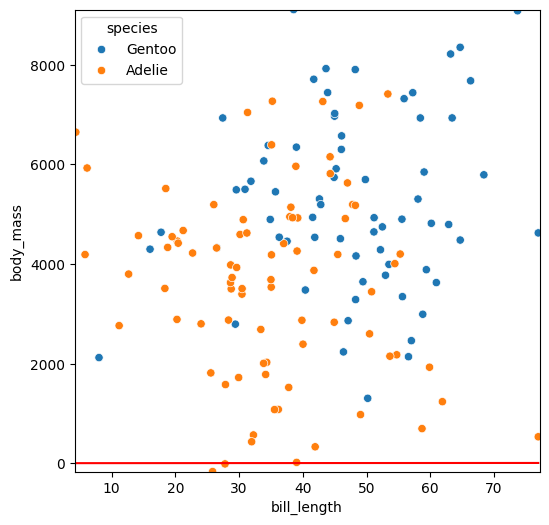

In [27]:
# Import data again to avoid previous transformation executed 
data.dropna(inplace=True)
data = data[data["species"] != "Chinstrap"]

X = data[["bill_length", "body_mass"]].copy()
y = data["species"].map({"Adelie": 0, "Gentoo": 1}).values
X["bias"] = 1
X = X[["bias", "bill_length", "body_mass"]]

# Train the model again without normalization on features
model = LogisticRegression(num_features=X.shape[1])
n_iter = 50
log_l_history, _ = fit(model, X, y, lr=0.5, num_steps=n_iter)

# Print the accuracy of the model
accuracy = ((model.predict(X) > 0.5) == y).mean()
print(f"Accuracy: {accuracy}")

# Plot the decision boundary in case of no trasformation on data
plt.figure(figsize=(6,6))
sns.scatterplot(data=X, x="bill_length", y="body_mass", hue=data["species"])
x_range = np.linspace(X['bill_length'].min(), X['bill_length'].max(), 100)
theta_final = model.parameters
y_range = -(theta_final[0] + theta_final[1] * x_range) / theta_final[2]
plt.plot(x_range, y_range, c="red")
plt.xlim(X['bill_length'].min() - 0.2, X['bill_length'].max() + 0.2)
plt.ylim(X['body_mass'].min() - 0.2, X['body_mass'].max() + 0.2)

The ```RuntimeWarning: overflow encountered in exp``` is caused by the missed normalization of data. Infact, the *body_mass* column contains value in a very large range, then when these are passed to the ```np.exp()``` function this warning is raised. To avoid this behaviour, we can modify the ```sigmoid``` function, in the ```math.py``` module to use the ```np.clip()``` function, that limits the range of input values in a specified interval, ensuring numerical stability.

```python
g = 1 / (1 + np.exp(-np.clip(x, -700, 700)))
```

## 2: **Polynomial Expansion**

### **2.1: Polynomial features for logistic regression**

Define new features e.g., of 2nd and 3rd degree, and learn a logistic regression classifier by using the new features and the gradient ascent optimization algorithm defined in Question 1.

In particular, consider a polynomial boundary with equation:

\begin{equation}
f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2
\end{equation}

Therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking $x$ and the new 7 features (in the order $x_1x_1, x_2x_2, x_1x_2, x_1x_1x_1, x_2x_2x_2, x_1x_1x_2, x_1x_2x_2$).
In particular create `x_new_quad` by additionally stacking $x$ with the quadratic features, and `x_new_cubic` by additionally stacking $x$ with the quadratic and the cubic features.

**Do not write below this line just run it**

--------------------------------------------

<Axes: >

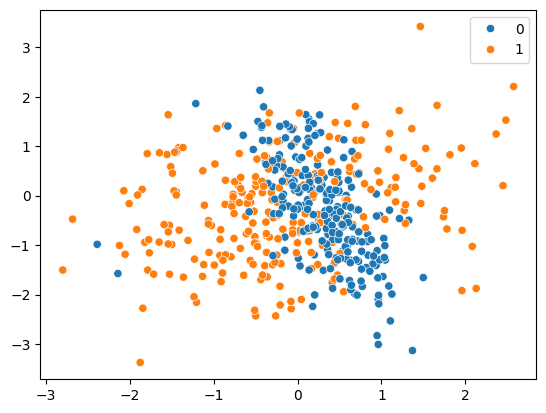

In [16]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=700,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=.3,
    random_state=89,
)
X = np.hstack([np.ones_like(X[:, [0]]), X])
X, X_val, y, y_val = train_test_split(X, y, test_size=200, random_state=42)

sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y)

In [17]:
def get_polynomial(X, degree):
    """
    Given an initial set of features, this function computes the polynomial features up to the given degree.

    Args:
        X: the initial features matrix of shape (n_samples, 3) where the first column is the bias term
        degree: the degree of the polynomial

    Returns:YOUR
        X: the final polynomial features
    """
    if degree < 2:
        return X

    # Initialize features as a 1D array
    features = np.ones(X.shape[0])
    new_features_matrix = []

    # Add initial features to new_features_matrix (excluding bias term)
    for i in range(1, X.shape[1]):
        new_features_matrix.append(X[:, i].reshape(-1, 1))

    # Generate polynomial features
    for d in range(2, degree + 1):
        
        # Generate powers of individual features up to 'degree'
        for i in range(1, X.shape[1]):
            new_feature = (X[:, i] ** d).reshape(-1, 1)
            new_features_matrix.append(new_feature)

        # Generate mixed terms like X_i^a * X_j^b, with a + b = d and i != j
        for i in range(1, X.shape[1]):
            for j in range(i + 1, X.shape[1]):  # Ensures j > i, so i != j
                for k in range(1, d):
                    mixed_feature = (X[:, i] ** (d - k) * X[:, j] ** k).reshape(-1, 1)
                    new_features_matrix.append(mixed_feature)

    # Combine all features into a single array
    new_features_matrix = np.hstack(new_features_matrix)

    # Reshape to 2D before concatenation
    features = np.hstack((features.reshape(-1, 1), new_features_matrix))

    return features


**Do not write below this line just run it**

--------------------------------------------

In [18]:
x_new_quad = get_polynomial(X, degree=2)
x_new_cubic = get_polynomial(X, degree=3)
print(x_new_quad.shape, x_new_cubic.shape)

(500, 6) (500, 10)


Now use the gradient ascent optimization algorithm to learn the models by maximizing the log-likelihood, both for the case of `x_new_quad` and `x_new_cubic`.


**Do not write below this line just run it**

--------------------------------------------

[Text(0.5, 0, 'Iterations'),
 Text(0, 0.5, 'Log Likelihood'),
 Text(0.5, 1.0, 'Log Likelihood History for Different Models')]

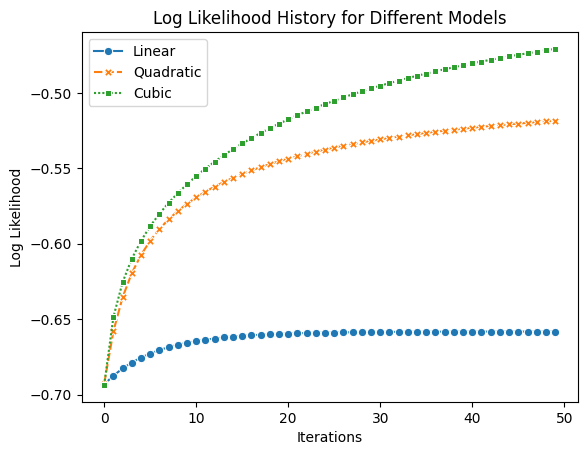

In [19]:
n_iter = 50
model_lin = LogisticRegression(num_features=X.shape[1])
log_l_history,_ = fit(model_lin, X, y, lr=0.5, num_steps=n_iter)

# Initialize model, in case of quadratic features
model_quad = LogisticRegression(num_features=x_new_quad.shape[1])
log_l_history_quad,_ = fit(model_quad, x_new_quad, y, lr=0.5, num_steps=n_iter)

# Initialize model, in case of quadratic and cubic features
model_cubic = LogisticRegression(num_features=x_new_cubic.shape[1])
log_l_history_cubic,_ = fit(model_cubic, x_new_cubic, y, lr=0.5, num_steps=n_iter)

log_l = np.stack([log_l_history, log_l_history_quad, log_l_history_cubic])

log_l_df = pd.DataFrame(log_l.T, columns=["Linear", "Quadratic", "Cubic"])
sns.lineplot(data=log_l_df, markers=True).set(
    xlabel="Iterations", ylabel="Log Likelihood", title="Log Likelihood History for Different Models"
)

### **2.2: Plot the computed non-linear boundary**

First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 2.

In [20]:
def boundary_function(x1_vec, x2_vec, theta_final, degree):
    """
    This function computes the boundary function for the given theta_final and degree.

    Args:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        theta_final: the final theta
        degree: the degree of the polynomial

    Returns:
        x1_vec: the x1 vector
        x2_vec: the x2 vector
        f: the boundary function
    """
    
    # Create a meshgrid from x1_vec and x2_vec
    x1_grid, x2_grid = np.meshgrid(x1_vec, x2_vec)

    # Flatten the grid to create an input matrix X for get_polynomial
    X_flat = np.column_stack((np.ones(x1_grid.size), x1_grid.ravel(), x2_grid.ravel()))

    # Generate polynomial features for a certain degree
    poly_features = get_polynomial(X_flat, degree)

    # Compute the boundary function values by taking the dot product with theta_final
    f = poly_features.dot(theta_final)

    # Return x1 and x2 grids in their original shapes and f as a flattened array
    return x1_vec, x2_vec, f

Now plot the decision boundaries corresponding to the theta_final_quad and theta_final_cubic solutions.

**Do not write below this line just run it**

--------------------------------------------

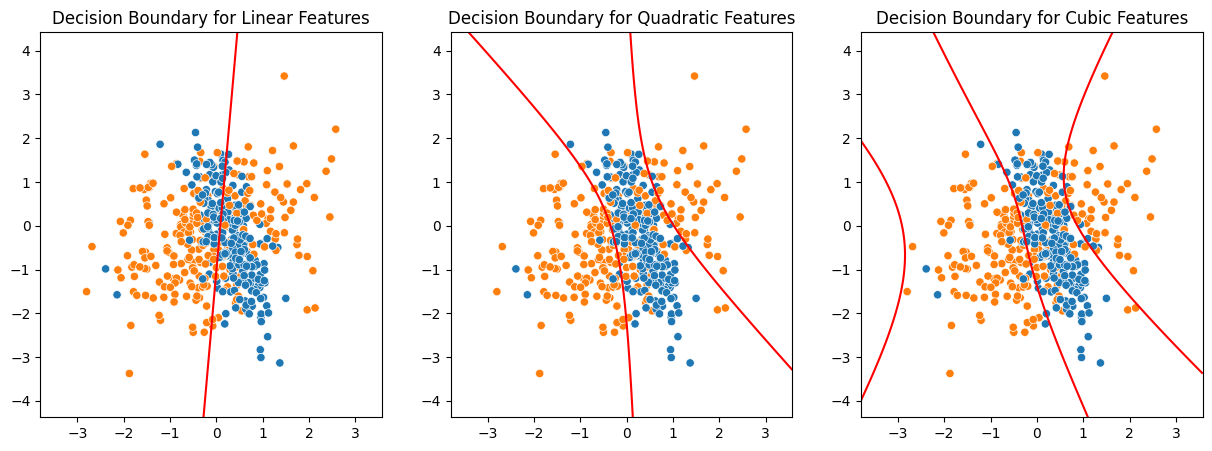

In [21]:
import numpy as np
def plot_boundary_function(
    X: np.ndarray, y: np.ndarray, theta: np.ndarray, degree: int, n_points: int = 200
) -> None:
    """
    This function plots the boundary function for the given theta and degree.

    Args:
        X: the input data
        y: the input labels
        theta: the final theta
        degree: the degree of the polynomial
        n_points: the number of points to plot

    Returns:
        None
    """

    x1_vec = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, n_points)
    x2_vec = np.linspace(X[:, 2].min() - 1, X[:, 2].max() + 1, n_points)

    x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta, degree=degree)
    mesh_shape = int(np.sqrt(f.shape[0]))

    sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y, legend=False)
    plt.contour(
        x1_vec, x2_vec, f.reshape((mesh_shape, mesh_shape)), colors="red", levels=[0]
    )

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_boundary_function(X, y, model_lin.parameters, degree=1)
plt.title("Decision Boundary for Linear Features")
plt.subplot(1,3,2)
plot_boundary_function(X, y, model_quad.parameters, degree=2)
plt.title("Decision Boundary for Quadratic Features")
plt.subplot(1,3,3)
plot_boundary_function(X, y, model_cubic.parameters, degree=3)
plt.title("Decision Boundary for Cubic Features");

**Polynomial degree and overfitting**

As the polynomial degree increases, the decision boundary becomes more and more complex. This can lead to overfitting, i.e. the model learns the training data too well, and it is not able to generalize to new data. This is a common problem in machine learning, and it is important to be able to detect it.

In order to detect overfitting, we can split the dataset into a training set and a test set. The training set is used to learn the model, while the test set is used to evaluate the model performance on new data. If the model performs well on the training set, but it performs poorly on the test set, then we have overfitting.

In this exercise, you are asked to plot the training and test accuracy as a function of the polynomial degree. Consider all the polynomial degrees from 1 to 20. For each polynomial degree, learn the model on the training set, and evaluate the accuracy on both the training and the test set. Additionally, visualize the decision boundary for the polynomials that give the **best** and the **worst** test accuracy for $\texttt{degree} \geq 2$.

In [22]:
from sklearn.preprocessing import normalize

def fit_polynomials(X, y, X_test, y_test, degrees, lr, num_steps, architecture = LogisticRegression):
    """
    This function fits a logistic regression model for each degree in the degrees list.
    """
    
    # Apply normalization on the features
    X = normalize(X)
    
    # Apply normalization also on the test set
    X_test = normalize(X_test)

    # Initialize list of parameters
    thetas = []

    # Initialize the lists of accuracy scores on train set and test set
    accuracy_scores_train, accuracy_scores_test = [], []

    for degree in tqdm(degrees):

        # Get the polynomial features, based on the number of degree given as input
        x_new = get_polynomial(X, degree=degree)

        # Initialize the model(default is Logistic Regression), with number of features given by the polynomial degree 
        model = architecture(num_features=x_new.shape[1])

        # Fit the model
        fit(model, x_new, y, lr=lr, num_steps=num_steps)

        # Store in the list of parameters the ones just computed for the current degree number 
        thetas.append(model.parameters)

        # Collect all the model predictions corresponding to the true label
        y_hat_train = model.predict(x_new) > 0.5

        # Store the accuracy score with respect to the label given as input
        accuracy_scores_train.append(accuracy_score(y, y_hat_train))
        
        # Repeat the process for the test set
        y_hat_test = model.predict(get_polynomial(X_test, degree=degree)) > 0.5
        accuracy_scores_test.append(accuracy_score(y_test, y_hat_test))

    return thetas, accuracy_scores_train, accuracy_scores_test

100%|██████████| 19/19 [00:00<00:00, 64.53it/s]


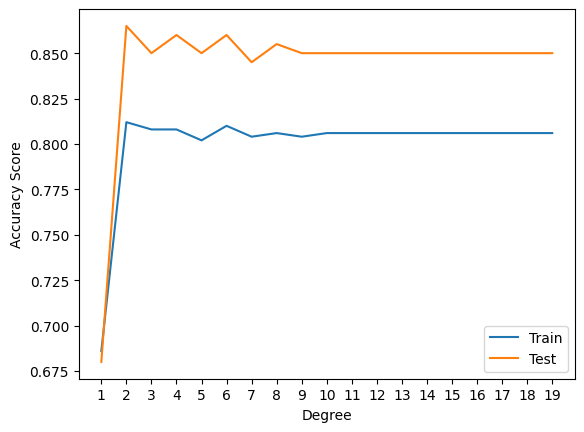

In [23]:
# Plot the accuracy score on train and test set for different number of degree.
degrees = np.arange(1, 20)
np.random.seed(42)
thetas, accuracy_scores_train, accuracy_scores_test = fit_polynomials(
    X, y, X_val, y_val, degrees=degrees, lr=0.5, num_steps=500, architecture=LogisticRegression
)
sns.lineplot(x=degrees, y=accuracy_scores_train, label="Train")
sns.lineplot(x=degrees, y=accuracy_scores_test,  label="Test")
plt.xlabel("Degree")
plt.ylabel("Accuracy Score")
plt.xticks(degrees)
plt.show()
# Which polynomal degree gives us the highest accuracy score? 

Collect the number of degree which provides us the best and worst accuracy for the model.

In [24]:
worst_model_degree = accuracy_scores_test.index(min(accuracy_scores_test[1:])) + 1
best_model_degree = accuracy_scores_test.index(max(accuracy_scores_test[1:])) + 1

In [26]:
print(f'Worst model degree: {worst_model_degree}, Best model degree: {best_model_degree}')

Worst model degree: 7, Best model degree: 2


Plot the best and the worst decision boundaries for $\texttt{degree} \geq 2$.

--------------------------------------------
**Write your code below this line**

--------------------------------------------

c:\Users\xavie\Documents\HW2_FDS\libs\math.py:14: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-x))


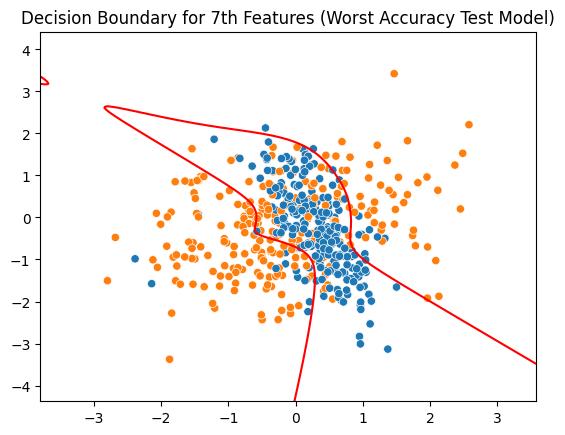

In [27]:
# Plot decision boundary for the worst degree
x_worst = get_polynomial(X, degree=worst_model_degree)
model_worst = LogisticRegression(num_features=x_worst.shape[1])
log_l_worst_model,_ = fit(model_worst, x_worst, y, lr=0.5, num_steps=n_iter)
plot_boundary_function(X, y, model_worst.parameters, degree=worst_model_degree)
plt.title("Decision Boundary for 7th Features (Worst Accuracy Test Model)");

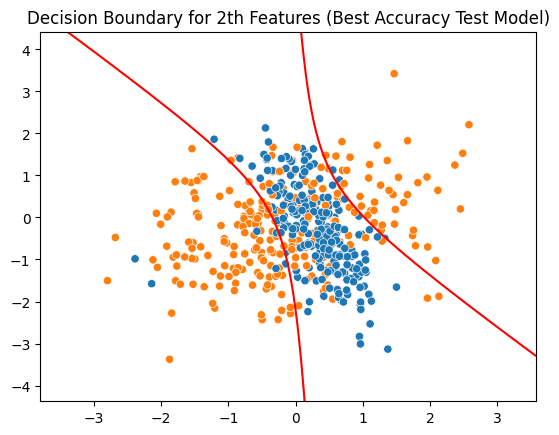

In [28]:
# Plot decision boundary for the best degree
x_best = get_polynomial(X, degree=2)
model_best = LogisticRegression(num_features=x_best.shape[1])
log_l_best_model,_ = fit(model_best, x_best, y, lr=0.5, num_steps=n_iter)
plot_boundary_function(X, y, model_best.parameters, degree=best_model_degree)
plt.title("Decision Boundary for 2th Features (Best Accuracy Test Model)");

#### **Report**
Write now your considerations. Discuss in particular:
1. Look back at the plots you have generated. What can you say about the differences between the linear, quadratic, and cubic decision boundaries? Can you say if the model is improving in performances, increasing the degree of the polynomial? Do you think you can incur in underfitting increasing more and more the degree?
2. Look at the plot of the training and test accuracy as a function of the polynomial degree. What can you say about the differences between the training and test accuracy? What can you say about the differences between the best and the worst test accuracy? In general, is it desirable to have a very complex decision boundary, i.e. a very high degree of the polynomial? Discuss and motivate your answer.
3. In general what are some properties of the dataset that makes it more prone to overfitting? Discuss their impact.


### 1. Look back at the plots you have generated. What can you say about the differences between the linear, quadratic, and cubic decision boundaries? Can you say if the model is improving in performances, increasing the degree of the polynomial? Do you think you can incur in underfitting increasing more and more the degree?
In the decision boundary plots, we can observe significant differences among the linear, quadratic, and cubic models:  

- **Linear**:  
  The decision boundary is a straight line, which may not capture the complexity of the data distribution. This leads to **underfitting**, as the linear model fails to understand the underlying structure of the data.  

- **Quadratic**:  
  The decision boundary is curved, offering greater flexibility in separating data points. This improve the model's ability to fit the data compared to the linear model, reducing underfitting.  

- **Cubic**:  
  The decision boundary becomes even more intricate, enabling the model to adapt to irregularities in the data. However, an overly complex boundary increases the risk of **overfitting**, where the model captures noise or specific patterns in the training data that do not generalize well.  

As observed, increasing the degree of the polynomial initially improves the model's performance. However, excessively high degrees can lead to **overfitting** rather than **underfitting**. The optimal degree balances flexibility and generalization to maximize performance.  

---

### 2. Look at the plot of the training and test accuracy as a function of the polynomial degree. What can you say about the differences between the training and test accuracy? What can you say about the differences between the best and the worst test accuracy? In general, is it desirable to have a very complex decision boundary, i.e. a very high degree of the polynomial? Discuss and motivate your answer.
- As the degree of the polynomial increases:  
  - **Training accuracy** typically improves as the model becomes more flexible and can better fit the training data.  
  - **Test accuracy** often plateaus or decreases, indicating the presence of **overfitting**. This happens because the model learns to memorize the training data, sacrificing its ability to generalize to unseen data.  

- Identifying the **best** and **worst** degrees:  
  - The **best degree** corresponds to the model with the highest test accuracy, representing an optimal balance between complexity and generalization (in our case $degree = 2$).  
  - The **worst degree** is associated with either an overly simple decision boundary (underfitting) or an overly complex one (overfitting).  

An overly complex decision boundary may capture noise and irrelevant details in the training data, reducing its ability to generalize. This underscores the importance of striking the right balance between simplicity and flexibility. Then, increase the degree is not always the best practice. 

---

### 3. In general what are some properties of the dataset that makes it more prone to overfitting? Discuss their impact.
- **Noisy data or outliers**:  
  A complex model may attempt to fit noise or outliers in the training data, resulting in an irregular and unstable decision boundary on test data.  

- **Small datasets**:  
  - Small datasets provide insufficient diversity, causing the model to memorize specific examples instead of learning generalizable patterns.  
  - A lack of variation in the dataset can further limit the model's ability to generalize, as it learns patterns specific to the limited examples provided.  

- **Imbalanced classes**:  
  In classification tasks, imbalanced datasets (where one class dominates) can lead the model to focus wrongly on the majority class, neglecting the minority class. This results in biased predictions and poor performance on less-represented classes.  

---


### **2.4: Weight Penalization**

Look at how complicated the decision boundaries become as you increase the degree. Can we improve this and prevent overfitting?
When dealing with overfitting one frequent solution is to use a weigth penalization technique like L2 or L1 penalization.

In our case we'll use L2 regularization. In this way the regularized likelihood will be:
$$
\texttt{Likelihood}_{reg}(\theta) = \texttt{Likelihood}(\theta) - \frac{\lambda}{2n} \sum^n_i \theta_i^2
$$
Thus we can derive the update rule as:
\begin{equation}
\theta_j:= \theta_j + \alpha( \frac{\partial l(\theta_j)}{\partial \theta_j} -  \frac{\partial}{\partial \theta_j} \left( \frac{\lambda}{2} \theta_j^2 \right ) )
\end{equation}

Calculating the second term of the update rule it's just a matter of analytically solving a simple gradient, do it, and then implement it by extending the `LogisticRegression` class:

--------------------------------------------

**Fill in the code in `libs/models/logisic_regression_penalized.py`**

--------------------------------------------

In [29]:
from libs.models import LogisticRegressionPenalized

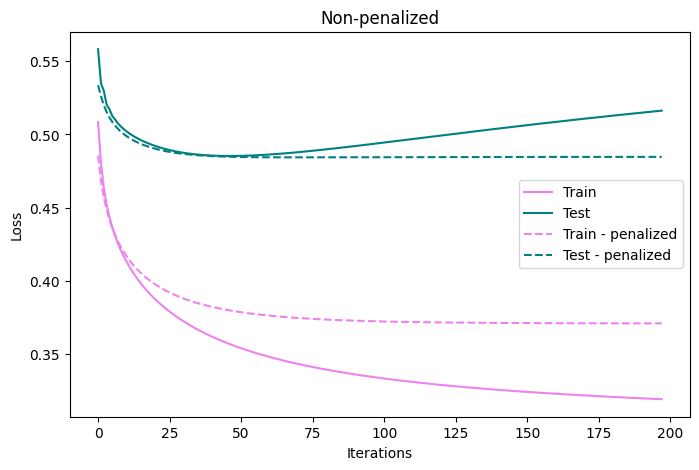

In [30]:
X,y = make_classification(
    n_samples=500,
    n_features=100,
    n_informative=50,
    n_redundant=25,
    n_classes=2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(X.shape[1])
likelihood_history, val_loss_history = fit(lr, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)

penalized_lt = LogisticRegressionPenalized(X.shape[1], 2)
pen_history, pen_val_history = fit(penalized_lt, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)

plt.figure(figsize=(8, 5))
plt.plot(-likelihood_history[2:], label="Train", color="violet")
plt.plot(val_loss_history[2:], label="Test", color='teal')
plt.plot(-pen_history[2:], label="Train - penalized", color="violet", linestyle="--")
plt.plot(pen_val_history[2:], label="Test - penalized", color="teal", linestyle="--")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Non-penalized")
plt.legend()

Now, evaluate the Penalized Logistic Regression for each value of $\lambda \in [0,3]$ and find the one that performs the best:

Best lambda: 1.3


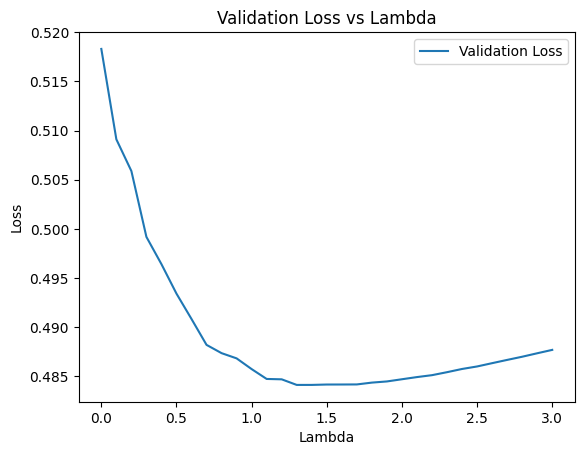

In [31]:
# Create an array for the lambda values from 0 to 3 with step 0.1
lambdas = np.arange(0, 3.1, 0.1)

# Initialize the list of loss values
losses = []

# Loop over each value of lambda
for lambda_ in lambdas:

    # Initialize the Logistic Regression Penalized model
    penalized_lt = LogisticRegressionPenalized(X.shape[1], lambda_)
    
    # Fit the model on our data storing the history of the loss on train and validatin set
    pen_history, pen_val_history = fit(penalized_lt, X_train, y_train, X_val, y_val, lr=1e-2, num_steps=200)
    
    # Store the validation loss value into our history list
    losses.append(pen_val_history[-1])

# Plot the loss values with respect to each lambda's value
if len(losses) > 0:
    sns.lineplot(x=lambdas, y=losses, label="Validation Loss").set(
        xlabel="Lambda", ylabel="Loss", title="Validation Loss vs Lambda"
    )
    print(f"Best lambda: {lambdas[np.argmin(losses)]}")

#### Report
Write now your considerations. In particular:
1. What happens when we use a non-penalized logistic regression?
2. Observe the plot of the Train and Validation losses in the penalized vs non penalized case. In which case is the Train loss better? Can you explain why?
3. What is the convergence rate? How is it influenced by the penalization?


**1.** In non-penalized logistic regression, the model does not have a regularization term, so it only minimizes the loss associated with the training data without any constraint on the parameter values.  
This can lead to **overfitting**, especially if the data is noisy or if there are too many features with respect to the sample size. In the plot, we observe that the test loss increases over iterations for the non-penalized model, which suggests that it may be overfitting to the training data.

**2.** In the plot, we see that the **train loss** is consistently lower for the **non-penalized** case compared to the penalized one.  
This happens because the penalization term discourages the model from fitting the training data too closely, leading to a higher training loss. However, this trade-off usually results in better generalization on new data, as the penalized model's test loss remains more stable and does not increase over time, unlike in the non-penalized case.

**3.** The convergence rate refers to the speed at which an algorithm approaches its optimal solution. In our case, it describes how quickly the loss function reaches its minimum value.
Penalization can significantly influence the **convergence rate** of a model. While the penalized model may appear to converge faster in terms of training loss, the added regularization term actually limits the magnitude of parameter updates. This constraint reduces the model's flexibility to overfit the training data. Consequently, the fact that the test loss for the penalized model converges without increasing as the number of iterations grows, in contrast to the non-penalized model, demonstrates the effectiveness of the penalty term in mitigating **overfitting**. 

## 3: **Multinomial Classification**

### **3.1: Softmax Regression Model**

In the multinomial classification we generally have $K>2$ classes. So the label for the $i$-th sample $X_i$ is $y_i\in\{1,...,K\}$, where $i=1,...,N$. The output class for each sample is estimated by returning a score $s_i$ for each of the K classes. This results in a vector of scores of dimension K.
In this exercise we'll use the *Softmax Regression* model, which is the natural extension of *Logistic Regression* for the case of more than 2 classes. The score array is given by the linear model:

\begin{align*}
s_i =  X_i \theta
\end{align*}

Scores may be interpreted probabilistically, upon application of the function *softmax*. The position in the vector with the highest probability will be predicted as the output class. The probability of the class k for the $i$-th data sample is:

\begin{align*}
p_{ik} = \frac{\exp(X_i \theta_k)}{\sum_{j=1}^K(X_i \theta_j))}
\end{align*}

We will adopt the *Cross Entropy* loss and optimize the model via *Gradient Descent*.
In the first of this exercise we have to:
-    Write the equations of the Cross Entropy loss for the Softmax regression model;
-    Compute the equation for the gradient of the Cross Entropy loss for the model, in order to use it in the gradient descent algorithm.

#### A bit of notation

*  N: is the number of samples
*  K: is the number of classes
*  X: is the input dataset and it has shape (N, H) where H is the number of features
*  y: is the output array with the labels; it has shape (N, 1)
*  $\theta$: is the parameter matrix of the model; it has shape (H, K)

--------------------------------------------
**Write you equation below this line**

--------------------------------------------

\begin{align*}
L(\theta) =  - \sum_{i=1}^N \sum_{k=1}^K y_{ik} \log(p_{ik})
\end{align*}

\begin{align*}
Loss(\theta) = \frac{1}{N} \cdot L(\theta)  =  -\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{ik} \log(p_{ik})

\end{align*}


\begin{align*}
\nabla_{\theta_k} L(\theta) = \frac{\partial L \theta}{\partial \theta}
\end{align*}

Begin by developing the $L(\theta)$

\begin{align*}
L(\theta) = - \sum_{i=1}^N \sum_{k=1}^K y_{ik} \log(p_{ik})= - \sum_{i=1}^N \sum_{k=1}^K y_{ik} \log(\frac{\exp(X_i \theta_k)}{\sum_{j=1}^K(X_i \theta_j))}) =
\end{align*}

\begin{align*}
= - \sum_{i=1}^N \sum_{k=1}^K y_{ik} \bigg(\log(\exp(X_i \theta_k)) - \log(\sum_{j=1}^K \exp(X_i \theta_j)) \bigg) =
\end{align*}

\begin{align*}
= - \sum_{i=1}^N \sum_{k=1}^K y_{ik} X_i \theta_k + \sum_{i=1}^N \log \sum_{j=1}^K \exp(X_i \theta_j)
\end{align*}

Compute the derivative

\begin{align*}
- \sum_{i=1}^N y_{ik} X_i + \sum_{i=1}^N \frac{1}{\sum_{j=1}^K \exp(X_i \theta_j)} \bigg( \frac{\partial }{\partial \theta_k} \sum_{j=1}^K \exp(X_i \theta_j) \bigg) =
\end{align*}

\begin{align*}
= - \sum_{i=1}^N y_{ik} X_i + \sum_{i=1}^N \frac{1}{\sum_{j=1}^K \exp(X_i \theta_j)} \exp(X_i \theta_k)X_i =
\end{align*}

\begin{align*}
= - \sum_{i=1}^N y_{ik} X_i + \sum_{i=1}^N \frac{\exp(X_i \theta_k)}{\sum_{j=1}^K \exp(X_i \theta_j)}X_i = - \sum_{i=1}^N y_{ik} X_i + \sum_{i=1}^N p_{ik} X_i =
\end{align*}

\begin{align*}
= - \bigg( \sum_{i=1}^N X_i (y_{ik} - p_{ik} )\bigg)
\end{align*}

### **3.2: Coding**

We are using the CIFAR-10 dataset for this exercise. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. It has 50,000 training images and 10,000 test images. The dataset was established by the Canadian Institute For Advanced Research (CIFAR), and it has become a standard benchmark for machine learning algorithms, especially in the area of image classification.

In [28]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

cifar_dir = "assets/cifar10"
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.CIFAR10(
    root=cifar_dir, train=True, download=True, transform=transform
)
test_data = datasets.CIFAR10(
    root=cifar_dir, train=False, download=True, transform=transform
)

# Convert labels to one-hot encoded format
def one_hot_encode(y, num_classes=10):
    encoded = np.zeros((len(y), num_classes))
    for i, val in enumerate(y):
        encoded[i, val] = 1
    return encoded

# Evaluate the accuracy of the predictions
def compute_accuracy(predictions, true_labels):
    correct_predictions = np.sum(predictions == true_labels)
    total_predictions = len(true_labels)
    return correct_predictions / total_predictions

# Preprocess the data
X_train = [img.reshape(-1).numpy() for img, _ in train_data]
X_train = np.array(X_train)
y_train = [label for _, label in train_data]

X_val = [img.reshape(-1).numpy() for img, _ in test_data]
X_val = np.array(X_val)
y_val = [label for _, label in test_data]


# Add bias term to X
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])

y_train_onehot = one_hot_encode(y_train)
y_test_onehot = one_hot_encode(y_val)

Files already downloaded and verified
Files already downloaded and verified


*Hint: consider the labels as one-hot vector. This will allow matrix operations (element-wise multiplication and summation).*

Now implement a classifier for Multinomial Classification using the `softmax` function. Again, implement it as a class with the methods:
- `predict`
- `predict_labels`
- `likelihood` *(Here you need to implement the Cross Entropy Loss)*
- `update_theta`
- `compute_gradient` to compute the Jacobian $\nabla$

Note that this this you don't need to reimplement the `fit()` function since the training loop you defined above works also for a Multinomial Classifier, provided that this is structured with the previously mentioned methods.

--------------------------------------------

**Fill in the code in `libs/models/multinomial.py` and `libs/math.py/softmax()`**

--------------------------------------------

In [29]:
from libs.models import SoftmaxClassifier
from libs.optim import fit

--------------------------------------------

**Do not write below this line just run it**

--------------------------------------------

*Execution can take around 10 minutes*

In [35]:
# Apply gradient descent to optimize theta
alpha = 0.01
iterations = 500
H, K = X_train.shape[1], 10  # number of features and number of classes
model = SoftmaxClassifier(num_features=H, num_classes=K)
loss_history, _ = fit(model, X_train, y_train_onehot, lr=alpha, num_steps=iterations)

# Make predictions on the training and test data
train_predictions = model.predict_labels(X_train)
test_predictions = model.predict_labels(X_val)

train_accuracy = compute_accuracy(train_predictions, y_train)
test_accuracy = compute_accuracy(test_predictions, y_val)

print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Training accuracy: 37.08%
Test accuracy: 36.51%


### **3.3: Pipeline**
Now you're going to use `scikit-learn` library to build a pipeline of operations to redo everything we've done so far in the homework. First we have loaded the required modules and the penguins dataset.

---

Then here you'll build the pipeline. We need four items:
1. The Numerical Transformer, to handle the preprocessing of numerical columns, by:
    - Imputing missing values with their mean
    - Enrich the features with a 3-rd degree polynomial expansion
    - Scaling of the features to $\mu=0, \sigma=1$
2. The Categorical Transformer, to handle the preprocessing of categorical values, by:
    - Imputing the missing values with the most frequent value
    - Encode the features in a one-hot vector.
3. The Preprocessor: a ColumnTransformer that distributed the numerical columns to the numerical transformer and the categorical columns to the categorical tranformer.
4. The final Pipeline, which contains the preprocessor and the classfier of your choice (in this case `KNeighborsClassifier`)

In [30]:
data = pd.read_csv('assets/train.csv')

X_train, X_val, y_train, y_val = train_test_split(data.drop('species', axis=1), data.species, test_size=0.2, random_state=42)

In [31]:

numerical_cols = ['bill_length', 'bill_depth', 'flipper_length', 'body_mass']
categorical_cols = ['island', 'sex']

## All the import necessary
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

numeric_transformer = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'),  # SimpleImputer() to replace missing values with the mean
    PolynomialFeatures(degree=3, include_bias=False),   # PolynomialFeatures() to create the polynomial features with degree 3
    StandardScaler()    # StandardScaler() to normalize numeric features
)

categoric_transformer = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent'), # SimpleImputer() to replace missing values with the mode
    OneHotEncoder(drop='if_binary', handle_unknown='error'), # OneHotEncoder() for the binary columns
)

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categoric_transformer, categorical_cols)
], remainder='drop')

pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors = 4))
if len(pipe.named_steps)>0:
    display(pipe)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['bill_length', 'bill_depth',
                                                   'flipper_length',
                                                   'body_mass']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['island', 'sex'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=4))])

Now, we can use this pipeline to preprocess the input data and fit a classifier. Leveraging `scikit-learn`'s pipelines allows you to:
- Define the entire chain of operations in a structured way, which is especially useful for cleaning and transforming data.
- Separate the definition of operations from their execution, creating a clean and organized workflow.

This approach makes it easier to manage complex preprocessing steps while maintaining readability and clarity in your code.

In [32]:
from sklearn.metrics import classification_report
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Adelie       0.71      0.75      0.73        20
   Chinstrap       0.71      0.56      0.62         9
      Gentoo       0.62      0.67      0.64        12

    accuracy                           0.68        41
   macro avg       0.68      0.66      0.67        41
weighted avg       0.69      0.68      0.68        41



This is nice but can we improve it? In defining the pipeline you certainly used some fixed hyperparameters, for example the number of neighbors or the degree of the polynomial expansion.

First, let's look at the list of hyperparameters:

In [33]:
hparams = pipe.get_params()
for hp, val in hparams.items():
    if type(val) not in [int, float, str]:
        continue
    print(f"{hp}: {val}")

columntransformer__remainder: drop
columntransformer__sparse_threshold: 0.3
columntransformer__num__simpleimputer__missing_values: nan
columntransformer__num__simpleimputer__strategy: mean
columntransformer__num__polynomialfeatures__degree: 3
columntransformer__num__polynomialfeatures__order: C
columntransformer__cat__simpleimputer__missing_values: nan
columntransformer__cat__simpleimputer__strategy: most_frequent
columntransformer__cat__onehotencoder__categories: auto
columntransformer__cat__onehotencoder__drop: if_binary
columntransformer__cat__onehotencoder__feature_name_combiner: concat
columntransformer__cat__onehotencoder__handle_unknown: error
kneighborsclassifier__algorithm: auto
kneighborsclassifier__leaf_size: 30
kneighborsclassifier__metric: minkowski
kneighborsclassifier__n_neighbors: 4
kneighborsclassifier__p: 2
kneighborsclassifier__weights: uniform


Some of these hyperparameters are set to their default values, while others are explicitly defined. However, any data scientist knows that hyperparameters should not be arbitrarily chosen; instead, they should be optimized through **Cross-Validation**.

We can leverage the compositionality of `scikit-learn` by incorporating the pipeline into a `GridSearchCV` class. This allows you to easily define a grid of parameters to val and automatically perform cross-validation over the combinations.

Choose at least 2 values for at least 3 hyperparameters. val their impact on the model and find the best combination.

In [34]:
from sklearn.model_selection import GridSearchCV

# We create a mapping for each possible value we want to test for each hyperparameter
grid = {
    'columntransformer__num__polynomialfeatures__degree': [2, 4],
    'kneighborsclassifier__n_neighbors': [7, 9, 11, 13, 15],
    'columntransformer__cat__onehotencoder__drop': ['if_binary', 'first', None],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__leaf_size': [10, 20, 30, 40],
}

# Create our GridSearchCV with resepct to the pipe defined before, where are stored all the hyperparameters
pipe_cv = GridSearchCV(pipe, grid, cv=7, n_jobs=-1, verbose=1)
if pipe_cv is not None:

    # Fit for all the possible combination of the hyperparameters
    pipe_cv.fit(X_train, y_train)

    print(f"Best score: {pipe_cv.best_score_}")
    for hp, val in pipe_cv.best_params_.items():
        print(f"{hp}: {val}")

Fitting 7 folds for each of 2880 candidates, totalling 20160 fits
Best score: 0.7701863354037267
columntransformer__cat__onehotencoder__drop: if_binary
columntransformer__num__polynomialfeatures__degree: 2
kneighborsclassifier__algorithm: ball_tree
kneighborsclassifier__leaf_size: 10
kneighborsclassifier__metric: manhattan
kneighborsclassifier__n_neighbors: 11
kneighborsclassifier__weights: uniform


c:\Users\xavie\Documents\HW2_FDS\.venv\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\xavie\Documents\HW2_FDS\.venv\lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.67701863 0.70186335 0.70186335 ... 0.70186335 0.65838509 0.68322981]
  warnings.warn(


`GridSearchCV` doesn't only find the best combination of hyperparmeters, but it also refits the model with the best hyperparameters it finds. Let's val this new model:

In [35]:
y_pred = pipe_cv.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Adelie       0.74      0.70      0.72        20
   Chinstrap       0.78      0.78      0.78         9
      Gentoo       0.69      0.75      0.72        12

    accuracy                           0.73        41
   macro avg       0.74      0.74      0.74        41
weighted avg       0.73      0.73      0.73        41



#### Report
1. How many combinations has your gridsearch tried?
2. Make a plot with the results of your hyperparameter grid
3. Do you notice any trend in the performance of certain hyperparameters?
4. Do the classifiers obtain the same accuracy on train and val sets? If not, try to give an explanation.
5. With the choice of hyperparameters you made, do you notice any trade-off between accuracy and compute power? Show with a plot.

### 1. How many combinations has your gridsearch tried?

In [68]:
# Store the pipe_cv results into a Pandas DataFrame for for easier manipulation
cv_res = pd.DataFrame(pipe_cv.cv_results_)
cv_res.columns = [col.split('__')[-1] for col in cv_res.columns]

print(f'Number of combinations tried by the GridSearchCV: {cv_res.shape[0]}')

Number of combinations tried by the GridSearchCV: 2880


### 2-3 Make a plot with the results of your hyperparameter grid.  Do you notice any trend in the performance of certain hyperparameters?

We chose to represent only the hyperparameters for which a significant difference in accuracy was observed. After testing several hyperparameters, we concluded that the only ones influencing the results are those related to K_Neighbors_Classifier. Consequently, the following plot shows the combinations tested by GridSearchCV with respect to the K_Neighbors parameters.

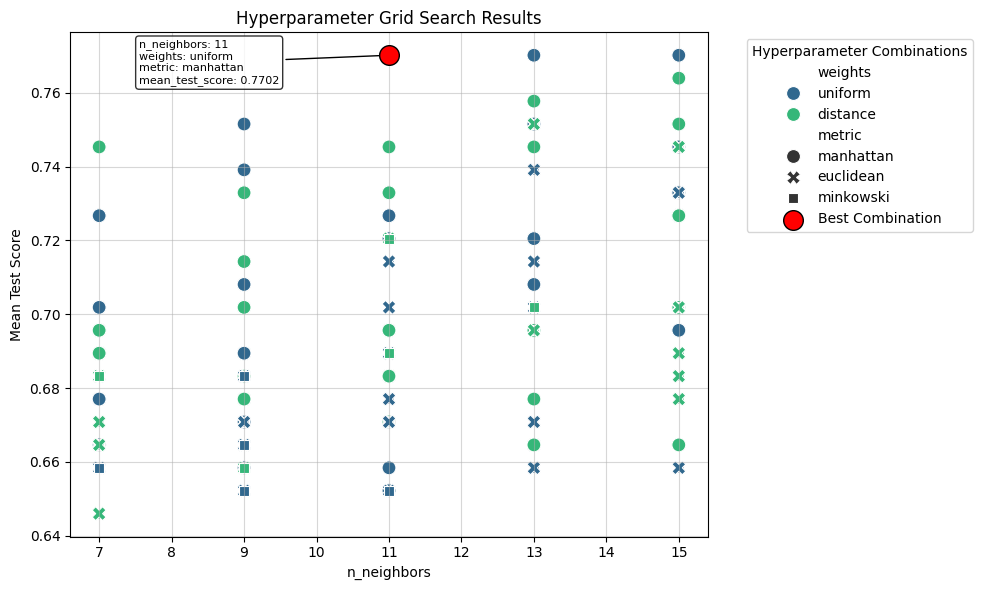

In [ ]:
# Sort by mean test score
cv_res = cv_res.sort_values(by="mean_test_score", ascending=False)

# Find the best point
best_point = cv_res.iloc[0]

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x=cv_res["n_neighbors"],
    y=cv_res["mean_test_score"],
    hue=cv_res["weights"],
    style=cv_res["metric"],
    palette="viridis",
    s=100
)

# Highlight the best point
plt.scatter(
    x=best_point["n_neighbors"],
    y=best_point["mean_test_score"],
    color="red", edgecolor="black", s=200, zorder=10, label="Best Combination"
)

# Add annotations for the best point
best_params = (f"n_neighbors: {best_point['n_neighbors']}\n"
            f"weights: {best_point['weights']}\n"
            f"metric: {best_point['metric']}\n"
            f"mean_test_score: {best_point['mean_test_score']:.4f}")
plt.annotate(
    best_params,
    xy=(best_point["n_neighbors"], best_point["mean_test_score"]),
    xytext=(-180, -20),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=8,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8)
)
plt.title("Hyperparameter Grid Search Results")
plt.xlabel("n_neighbors")
plt.ylabel("Mean Test Score")
plt.legend(title="Hyperparameter Combinations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


We can observe that as the number of k-neighbors increases, accuracy tends to improve, making it the most influential parameter. In our specific case, the best accuracy for the weights hyperparameter is achieved with the uniform setting. Similarly, the distance hyperparameter that provides the highest accuracy is the Manhattan distance, which generally assumes higher values compared to the Euclidean and Minkowski distances. We can also observe that this behavior is repeated for every number of neighbors, except for the smallest one considered (i.e., 7).

### 4. Do the classifiers obtain the same accuracy on train and val sets? If not, try to give an explanation.

No, the classifiers do not achieve the same accuracy on the training and validation sets. The training accuracy (0.82) is higher than the validation accuracy (0.73).  
This discrepancy can be attributed to various factors. One possible reason is overfitting, where the model performs better on the training data by learning irrelevant patterns that do not generalize well to the validation set. However, this may not necessarily be the case here. Other potential reasons include suboptimal hyperparameter choices, which could limit the model's ability to generalize, or variability in the validation set, which might be too small or not representative of the overall data distribution.

In [47]:
train_set_predictions = pipe_cv.predict(X_train)
val_set_predictions = pipe_cv.predict(X_val)

train_set_accuracy = compute_accuracy(train_set_predictions, y_train)
val_set_accuracy = compute_accuracy(val_set_predictions, y_val)

print(f"Accuracy on train set: {train_set_accuracy}")
print(f"Accuracy on validation set: {val_set_accuracy}")

Accuracy on train set: 0.8198757763975155
Accuracy on validation set: 0.7317073170731707


### 5. With the choice of hyperparameters you made, do you notice any trade-off between accuracy and compute power? Show with a plot.

In the plot the highest accuracy values, around 0.76, are achieved with relatively low fit times, specifically between 0.005 and 0.010 seconds. This suggests that certain hyperparameter configurations are not only accurate but also computationally efficient.  
However, as the fit time increases after 0.010 seconds, there is no significant improvement in accuracy, and in some cases, it even decreases. This indicates that higher computational cost does not always translate to better performance, so we can say there is not a trade-off between accuracy and compute power. Then, the optimal choice of hyperparameters would aim to balance accuracy and fit time, avoiding unnecessary computational expense.

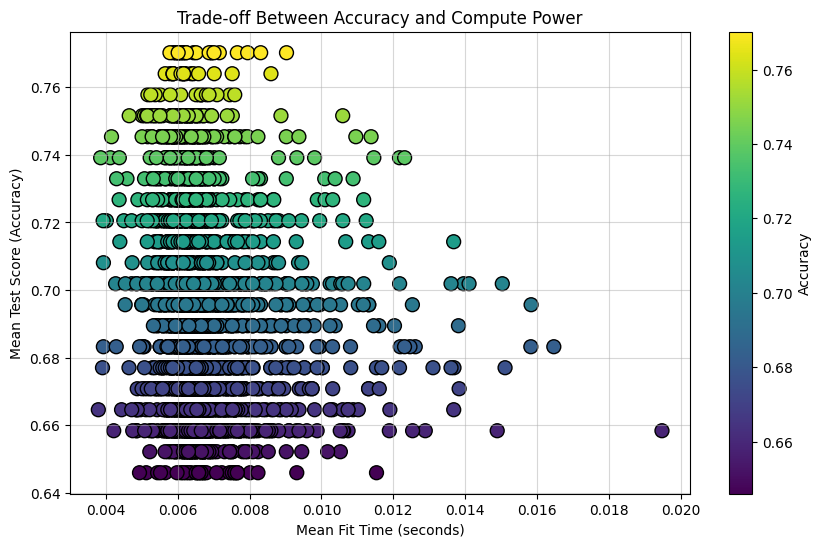

In [ ]:
cv_res = cv_res.sort_values(by="mean_test_score", ascending=False)
accuracy = cv_res["mean_test_score"]
compute_time = cv_res["mean_fit_time"]

plt.figure(figsize=(10, 6))
plt.scatter(compute_time, accuracy, c=accuracy, cmap="viridis", s=100, edgecolor="k")
plt.colorbar(label="Accuracy")
plt.title("Trade-off Between Accuracy and Compute Power")
plt.xlabel("Mean Fit Time (seconds)")
plt.ylabel("Mean Test Score (Accuracy)")
plt.grid(alpha=0.5)
plt.show()

## **4: Debugging a CNN with Shape Errors**

You are provided with a CNN model intended to classify images from the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. However, the model contains shape mismatches between layers due to intentional errors. Your first task is to identify and fix these errors to make the model functional.*testo in corsivo*

In [71]:
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import torch

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


### 4.1: Split the CIFAR-10 Dataset

Instructions:

* Define the Split Sizes:
Calculate the sizes for the training and validation datasets. Allocate ***80% of the training*** data for the training set and *20% for the validation set*.

* Split the Dataset:
Use `torch.utils.data.random_split` to create the training and validation datasets from the original training dataset.

* Create Data Loaders:
Create data loaders for the training, validation, and test datasets using torch.utils.data.DataLoader with a ***batch size of 64***. Ensure that the training data is ***shuffled***.

* Print the size of each dataset (train, test, val)

In [72]:
# Define transformations for the data that we will use
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the CIFAR-10 dataset
full_train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define the train size(80% of the training data)
train_size = int(0.8 * len(full_train_dataset))

# Define validation set size(rest 20%)
val_size = len(full_train_dataset) - train_size

# Shuffle the train and validation set
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [train_size, val_size])

# use these names for the data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True)

# Visualize the sizes of the train, validion, test sets
print(f'Size of the training set: {len(train_dataset)}')
print(f'Size of the validation set: {len(val_dataset)}')
print(f'Size of the test set: {len(test_dataset)}')

Files already downloaded and verified
Files already downloaded and verified
Size of the training set: 40000
Size of the validation set: 10000
Size of the test set: 10000


### 4.2: Identify and Correct Errors in the CNN Model


In this exercise, you will analyze an intentionally incorrect implementation of a Convolutional Neural Network model. Your task is to identify the errors in the `PoorPerformingCNN` class and correct them to ensure the model works properly for the CIFAR-10 dataset.

--------------------------------------------

**Fill in the code in `libs/models/poor_cnn.py**

--------------------------------------------

In [5]:
from libs.models import PoorPerformingCNN

net = PoorPerformingCNN()

Loss Function and optimizer

In [6]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

### 4.3: Training procedure

In this exercise, you will complete the training and validation loop of a neural network model. Your task is to compute and store the average training loss, average validation loss, and the corresponding accuracies for each epoch.

Instructions:

* **Training Phase**:
After computing the average training loss (avg_train_loss), you need to calculate the training accuracy based on the model's predictions and append the calculated training accuracy to the train_accuracies list.

* **Validation Phase**:
After calculating the average validation loss (avg_val_loss), you need to calculate the validation accuracy based on the validation dataset and append the calculated validation accuracy to the val_accuracies list. (the same as befor but for the val)

In [7]:
for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        print(inputs.shape)
        print(labels.shape)
        break

torch.Size([64, 3, 32, 32])
torch.Size([64])


In [8]:
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

num_epochs = 10
# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    total_batches = 0

    # Training Phase
    net.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        total_batches += 1

    # Calculate average loss for the training epoch
    avg_train_loss = running_loss / total_batches
    train_losses.append(avg_train_loss)

    # Calculate training accuracy
    _, y_pred = torch.max(outputs, 1)  # Get predicted class labels
    train_accuracy = (y_pred == labels).sum().item() / len(labels)
    train_accuracies.append(train_accuracy)

    print(f'Epoch {epoch + 1}, Average Training Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

    # Validation Phase
    net.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for val_data in val_loader:
            val_inputs, val_labels = val_data

            # Forward pass
            val_outputs = net(val_inputs)

            # Compute loss
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()

            # Calculate accuracy
            _, val_predicted = torch.max(val_outputs.data, 1)
            total += val_labels.size(0)
            correct += (val_predicted == val_labels).sum().item()

    # Compute average loss for the validation epoch
    avg_val_loss = val_running_loss / total
    val_losses.append(avg_val_loss)

    # Compute validation accuracy
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch + 1}, Average Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

print('Finished Training')


Epoch 1, Average Training Loss: 1.8999, Training Accuracy: 0.4219
Epoch 1, Average Validation Loss: 0.0266, Validation Accuracy: 0.3970
Epoch 2, Average Training Loss: 1.6387, Training Accuracy: 0.5156
Epoch 2, Average Validation Loss: 0.0249, Validation Accuracy: 0.4341
Epoch 3, Average Training Loss: 1.5424, Training Accuracy: 0.3438
Epoch 3, Average Validation Loss: 0.0239, Validation Accuracy: 0.4653
Epoch 4, Average Training Loss: 1.4759, Training Accuracy: 0.5625
Epoch 4, Average Validation Loss: 0.0223, Validation Accuracy: 0.5023
Epoch 5, Average Training Loss: 1.4080, Training Accuracy: 0.5312
Epoch 5, Average Validation Loss: 0.0217, Validation Accuracy: 0.5140
Epoch 6, Average Training Loss: 1.3609, Training Accuracy: 0.4531
Epoch 6, Average Validation Loss: 0.0214, Validation Accuracy: 0.5218
Epoch 7, Average Training Loss: 1.3314, Training Accuracy: 0.5000
Epoch 7, Average Validation Loss: 0.0208, Validation Accuracy: 0.5420
Epoch 8, Average Training Loss: 1.3051, Training

### 4.4: Evaluate

In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Accuracy on the test images: 55.10%


### 4.5: Report

1. What challenges can class imbalance introduce when training a machine learning model?

2. What are some strategies to address class imbalance in your dataset or training process?

3. Why might accuracy alone be misleading as a performance measure in the presence of class imbalance

4. Is the cifar-10 an imbalanced dataset? plot the number of samples for each classes inside the cifar 10 dataset.

-------------------------------------------------------

### 1. What challenges can class imbalance introduce when training a machine learning model?  

Class imbalance for machine learning models often exhibit bias toward the majority class, as optimizing for accuracy typically prioritizes this larger group. <br> 
This bias results in poor generalization for the minority class, as the model struggles to learn its features effectively. 

### 2. What are some strategies to address class imbalance in your dataset or training process?  

Addressing class imbalance involves a range of techniques aimed at improving model performance, for example resampling methods include oversampling the minority class through duplication or synthetic sample generation and undersampling the majority class to balance representation. <br>
Algorithm-level approaches involve using specialized methods like tree-based models with cost-sensitive learning, which penalizes misclassifications of the minority class more heavily. Data augmentation can also help by applying transformations to create more diverse minority class samples. <br>
Evaluation strategies should focus on metrics better suited to imbalanced datasets, such as precision and recall.

### 3. Why might accuracy alone be misleading as a performance measure in the presence of class imbalance  

In the case of imbalanced classed accuracy can be not so useful, in fact accuracy treats all classes equally, regardless of their relative importance or frequency. Then accuracy alone  can be misleading and disguise low performance on the target class.

### 4. Is the cifar-10 an imbalanced dataset? plot the number of samples for each classes inside the cifar 10 dataset.

We can count the number of each classes in the dataset by counting the number of each label in the samples and plot the results.
As you can see from the barchart plotted down that all the classes are equally distribuited into the CIFAR-10 dataset, and you can also verify it by looking to the [official website](https://www.cs.toronto.edu/~kriz/cifar.html) in which the dataset is collected and avialable to the download. 

-------------------------------------------------------

In [ ]:
class_counts = [0] * 10
for _, label in full_train_dataset:
    class_counts[label] += 1

class_labels = full_train_dataset.classes

df = pd.DataFrame({
    'Class': class_labels,
    'Number of Samples': class_counts
})

df.head(10)

,Class,Number of Samples
0,airplane,5000
1,automobile,5000
2,bird,5000
3,cat,5000
4,deer,5000
5,dog,5000
6,frog,5000
7,horse,5000
8,ship,5000
9,truck,5000


## **5: Improve the accuracy** (BONUS)

### 5.1: Custom model

After successfully debugging the model, you'll notice that the accuracy on the CIFAR-10 dataset is only around 50-60%. Your second task is to improve the model's performance.

How?

*   Add more convolutional layers to capture higher-level features.
*   Use Batch Normalization
*   Add Dropout Layers

Data Augmentation:
*   Apply transformations like random cropping, flipping, and rotation.

Hint: You CAN implement already pre-existing CNN architectures (do your research). As long as it is a CNN everything is fine.

By the end of this section you should return the accuracy of your model on the test dataset.

NB: by better score we mean at least +10% with respect to the previous model.





In [ ]:
# Define transformations for the train set
transformtrain = transforms.Compose([
    transforms.RandomRotation(20), # Apply a random rotation between -20 and 20 degrees to the image
    transforms.ColorJitter(brightness=0.2, # Apply a tranformation which changes in a range of -0.2 and 0.2 the original value of the image's brigthness
                           contrast=0.2, # Apply the same transformation for the contrast
                           saturation=0.2, # Apply the same transformation for the saturation level
                           hue=0.1), # Apply a transformation on the color tint in a range of -0.05 and 0.05 from the original value
    transforms.ToTensor(),

    # Normalizing the values of the input channels
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Define transformations for the test set
transformtest = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transformtrain)
test_dataset  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transformtest)

# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


--------------------------------------------

**Fill in the code in `libs/models/custom_cnn.py**

--------------------------------------------

In [10]:
from libs.models import CustomCNN

net = CustomCNN().to(device)

#### Training

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=5e-05)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):

    # Train the CNN
    net.train()

    # Initialize the loss value
    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        
        # From the batch collect the images and labels
        inputs, labels = data
        
        # Assign to the device used (in our case cuda, in other words GPU)
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Brings to zero the cumuled parameter gradients within the tensors
        optimizer.zero_grad()
        
        # Give to the CNN the inputs collected
        outputs = net(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward propagation
        loss.backward()

        # Update the parameters
        optimizer.step()

        # Add the loss for the current iteration 
        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}')

print('Finished Training')


Epoch 1, Loss: 1.0126
Epoch 2, Loss: 0.9216
Epoch 3, Loss: 0.8548
Epoch 4, Loss: 0.8065
Epoch 5, Loss: 0.7650
Epoch 6, Loss: 0.7343
Epoch 7, Loss: 0.7097
Epoch 8, Loss: 0.6838
Epoch 9, Loss: 0.6602
Epoch 10, Loss: 0.6391
Epoch 11, Loss: 0.6232
Epoch 12, Loss: 0.6173
Epoch 13, Loss: 0.5988
Epoch 14, Loss: 0.5881
Epoch 15, Loss: 0.5749
Epoch 16, Loss: 0.5677
Epoch 17, Loss: 0.5633
Epoch 18, Loss: 0.5535
Epoch 19, Loss: 0.5456
Epoch 20, Loss: 0.5345
Finished Training


#### Evaluation

In [ ]:
# Evaluate the model
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Forward pass: compute the model's output (predictions)
        outputs = net(images)

        # We take as predicted value the one with the highest probability
        _, predicted = torch.max(outputs.data, 1)

        # Update the total number of samples processed in the batch
        total += labels.size(0)
        
        # Count the number of correct prediction
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Accuracy on the test images: 81.03%



### 5.2: Pretrained network
In this exercise, you will start from scratch to adapt a pre-trained AlexNet model for the CIFAR-10 dataset.

Instructions

- Use torchvision.models to load a pre-trained AlexNet. Be sure to specify that the model should be pre-trained on ImageNet.

- The CIFAR-10 dataset has 10 classes, so you need to update the model’s final layer to output 10 classes instead of the default 1000.

- Replace the final fully connected layer in AlexNet’s classifier to output 10 classes.

- To perform fine-tuning, freeze all layers except the newly added fully connected layer.

- Move your model to the appropriate device (cuda if available). Define a device and ensure the model is moved to that device.


In [25]:
# Define transformations for the data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [11]:
from torchvision.models import alexnet, AlexNet_Weights

# Use the pre-trained AlexNet model on ImageNet
weights = AlexNet_Weights.IMAGENET1K_V1
model = alexnet(weights=weights)

# Check the model structure
model.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [ ]:
# Replace the final fully connected layer to output 10 classes
model.classifier[6] = nn.Linear(4096, out_features = 10)

# Freeze all layers except the final one
for param in model.features.parameters():
    param.requires_grad = False
model.classifier[6].requires_grad = True
model = model.to(device)

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001, weight_decay=5e-05)

# Training loop
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}')

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test images: {100 * correct / total:.2f}%')

Epoch 1, Loss: 0.7630
Finished Training
Accuracy on the test images: 81.70%
